In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_internet_accesos = pd.read_csv(r'dataset_processed\Internet_Penetracion_prces')
df_movil_accesos = pd.read_csv(r'dataset_processed\movil_accesos_prces')


In [7]:
df_internet_accesos.head(3)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,buenos aires,78.11
1,2022,3,capital federal,122.28
2,2022,3,catamarca,65.33


In [10]:
df_movil_accesos.tail(3)

,Año,Trimestre,Accesos por cada 100 hab
36,2022,1,129
37,2022,2,129
38,2022,3,129


In [15]:
df_internet_capital = df_internet_accesos[df_internet_accesos['Provincia'] == 'capital federal']
df_internet_capital = df_internet_capital.sort_values(['Año', 'Trimestre'], ascending=True)


In [17]:
df_movil_comparacion = df_movil_accesos[df_movil_accesos['Año']>2013]

In [19]:
df_combined_accesos = pd.merge(df_internet_capital, df_movil_comparacion, on='Año')


In [22]:
df_combined_accesos

,Año,Trimestre_x,Provincia,Accesos por cada 100 hogares,Trimestre_y,Accesos por cada 100 hab
0,2014,1,capital federal,112.25,1,148
1,2014,1,capital federal,112.25,2,143
2,2014,1,capital federal,112.25,3,143
3,2014,1,capital federal,112.25,4,143
4,2014,2,capital federal,113.14,1,148
...,...,...,...,...,...,...
132,2022,2,capital federal,121.31,2,129
133,2022,2,capital federal,121.31,3,129
134,2022,3,capital federal,122.28,1,129
135,2022,3,capital federal,122.28,2,129


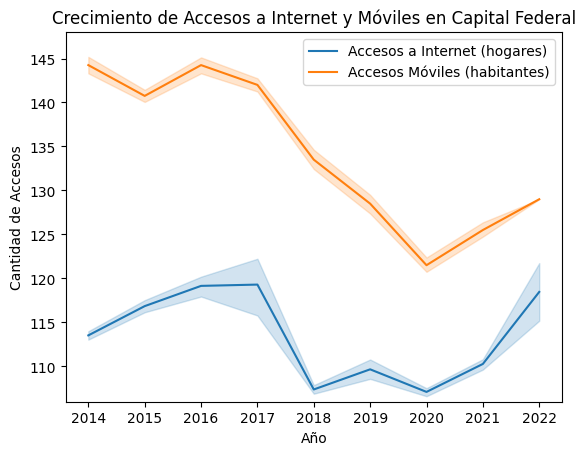

In [29]:
# Crear el gráfico de líneas utilizando Seaborn
sns.lineplot(data=df_combined_accesos, x='Año', y='Accesos por cada 100 hogares', label='Accesos a Internet (hogares)')
sns.lineplot(data=df_combined_accesos, x='Año', y='Accesos por cada 100 hab', label='Accesos Móviles (habitantes)')

# Personalizar el gráfico
plt.title('Crecimiento de Accesos a Internet y Móviles en Capital Federal')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accesos')

# Obtener el valor mínimo y máximo de los datos
min_value = df_combined_accesos[['Accesos por cada 100 hogares', 'Accesos por cada 100 hab']].min().min()
max_value = df_combined_accesos[['Accesos por cada 100 hogares', 'Accesos por cada 100 hab']].max().max()

# Ajustar el eje Y para que vaya desde el valor mínimo hasta el valor máximo
plt.ylim(min_value, max_value)

# Mostrar el gráfico
plt.legend()
plt.show()

Eventualmente ambos tipos de accesos caen en un punto en comun 2020, cuando la pandemia empieza, y es ahi tambien cuando empieza una repuntada por parte de ambos servicios.

In [31]:
correlation = df_combined_accesos['Accesos por cada 100 hogares'].corr(df_combined_accesos['Accesos por cada 100 hab'])
print("Correlación entre Accesos a Internet y Accesos Móviles:", round(correlation,2))

Correlación entre Accesos a Internet y Accesos Móviles: 0.61


In [32]:
df_combined_accesos['Accesos por cada 100 hogares'].mean()  #Internet Fijo

113.26810218978102

In [33]:
df_combined_accesos['Accesos por cada 100 hab'].mean() #Telefonia Movil

134.63503649635035